EDA stands for Exploratory Data Analysis. It is a process of analyzing data sets to summarize their main characteristics, often with visual methods. It's a crucial step before the data is further used for machine learning models, as it allows one to understand the data better, make assumptions, formulate hypotheses and check for errors.

## Important Necessary Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# Data Loading

In [6]:
df = pd.read_csv('titanic_dataset.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Data Understanding


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Missing Value check

In [9]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [39]:
df1=df.drop(['Cabin'],axis=1)

In [29]:
med=df1['Age'].median()
df1['Age']=df1['Age'].fillna(med)
100*df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [30]:
df2=df1[df1['Embarked'].notnull()]
df1.shape,df2.shape

((891, 11), (889, 11))

In [31]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
df1 = pd.DataFrame()  

In [41]:
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"] 
num_cols=["Age","Fare"] 
extra_cols=["PassengerId","Name","Ticket"]

Univariate Analysis
Numerical

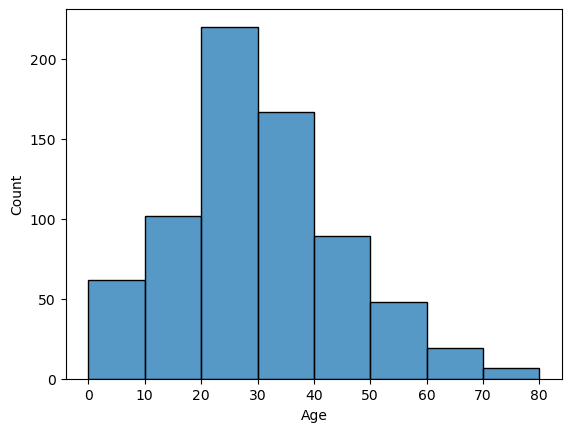

In [44]:
sns.histplot(x=df1['Age'], bins=range(0, 90, 10))
plt.show()


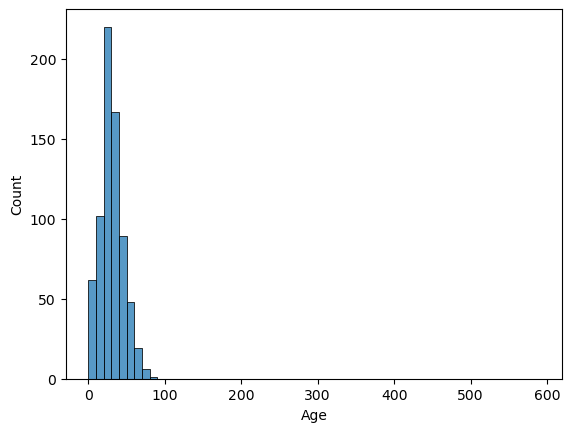

In [43]:
sns.histplot(x=df1['Age'], bins=range(0,600,10))
plt.show()


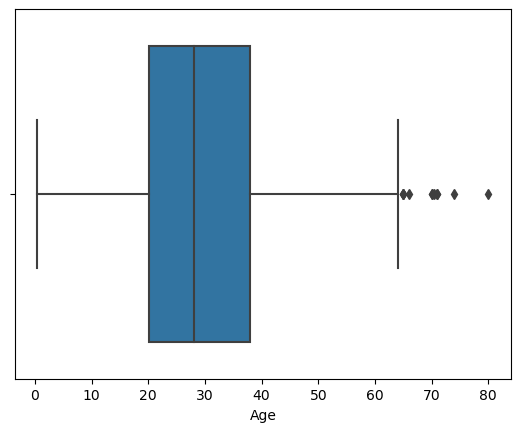

In [46]:
sns.boxplot(x=df1['Age'])
plt.show()

#quantile = quarter + Percentile
#Q1 = 25th percentile, Q2 = 50th percentile, Q3 = 75th percentile
#Upper Bound = Q3 + 1.5*(Q3-Q1)
#Lower Bound = Q1 - 1.5*(Q3-Q1)

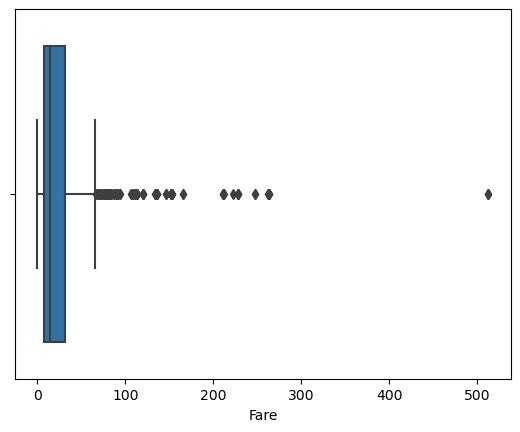

In [47]:
sns.boxplot(x=df1['Fare'])
plt.show()

In [49]:
df1["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Categorical

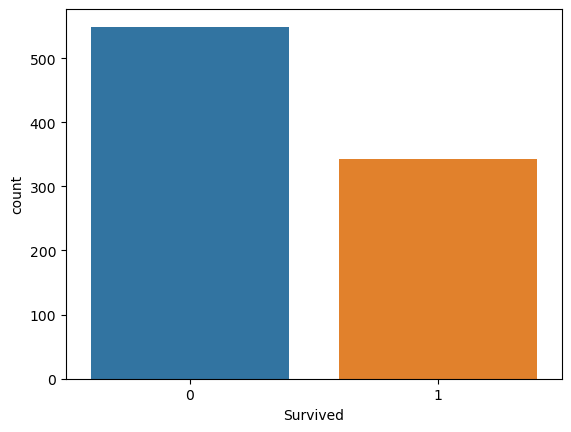

In [48]:
sns.countplot(x=df1['Survived'])
plt.show()

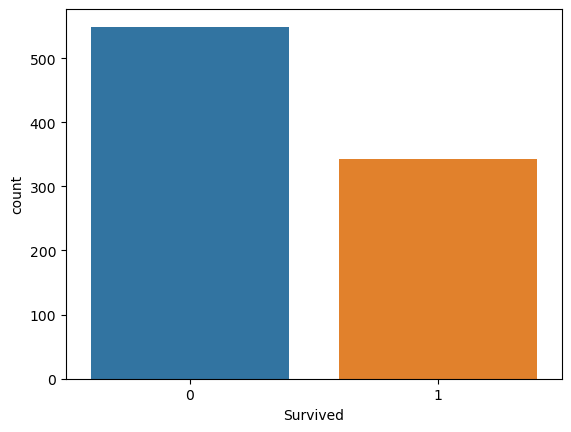

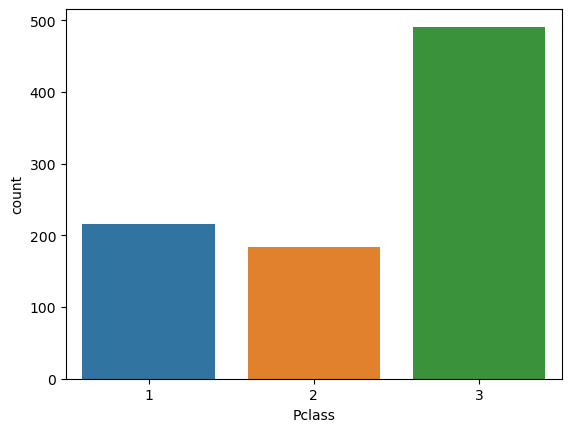

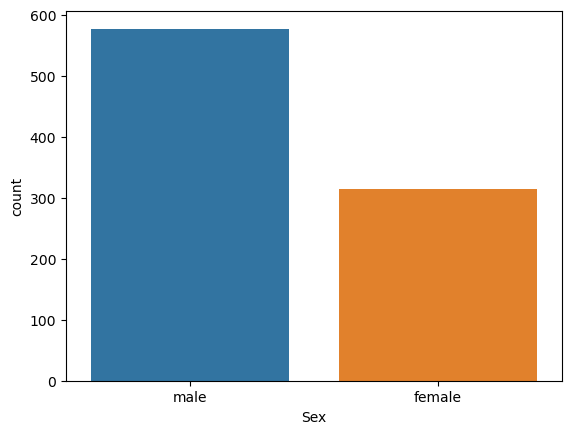

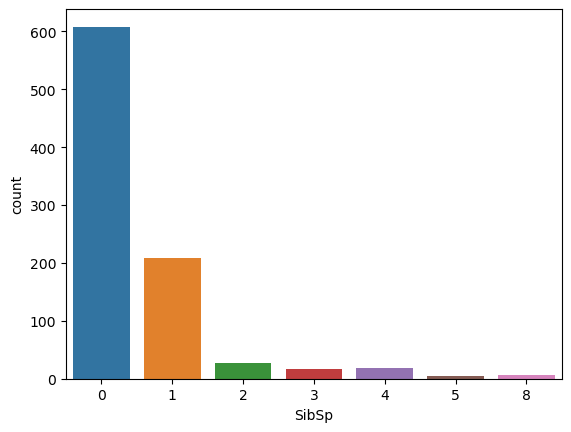

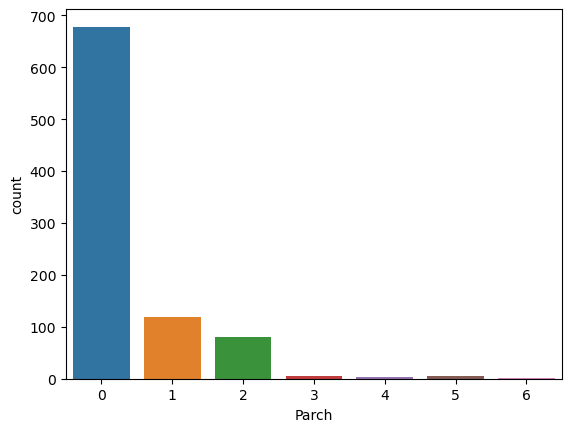

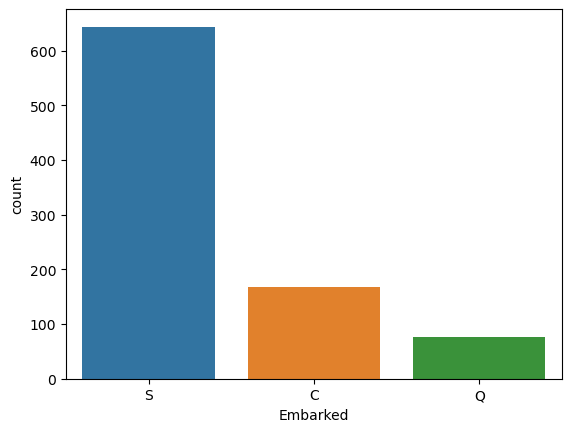

In [50]:
for i in cat_cols:
    sns.countplot(x=df1[i])
    plt.show()

In [53]:
y=df1["Pclass"].value_counts(normalize=True).values
name=df1["Pclass"].value_counts(normalize=True).index


In [55]:
df1["Pclass"].value_counts(normalize=True).index

Index([3, 1, 2], dtype='int64', name='Pclass')

-----------Survived-----------


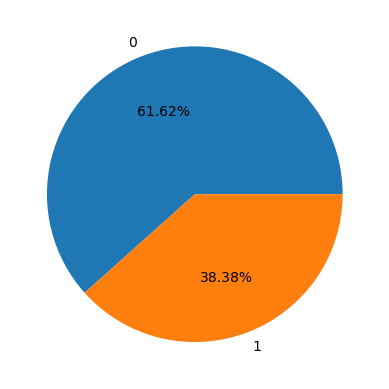

-----------Pclass-----------


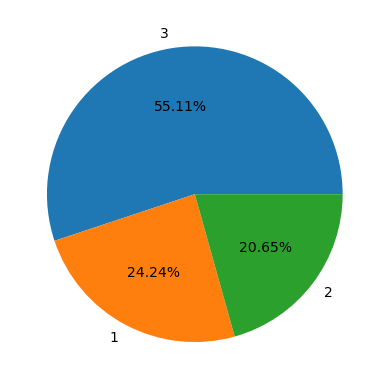

-----------Sex-----------


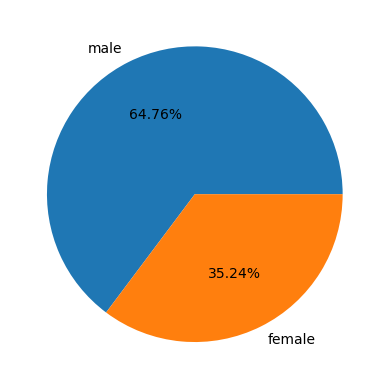

-----------SibSp-----------


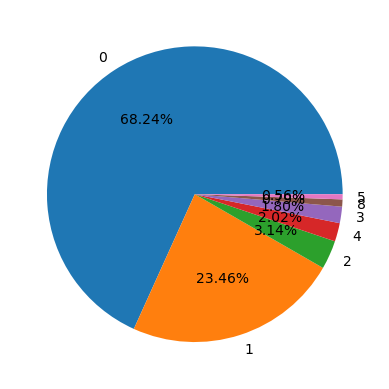

-----------Parch-----------


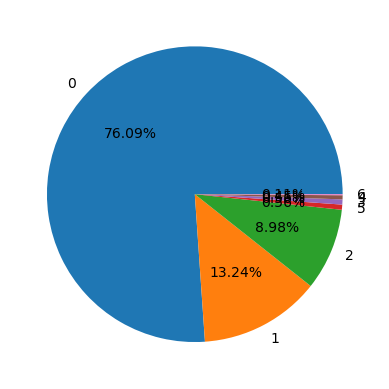

-----------Embarked-----------


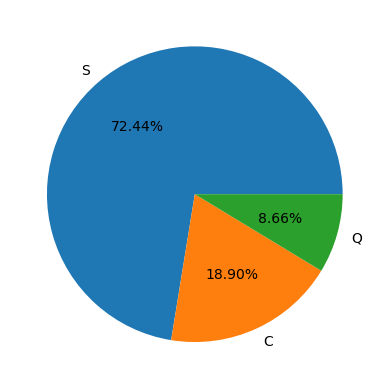

In [59]:
for i in cat_cols:
    print("-----------" + i + "-----------")
    y=df1[i].value_counts(normalize=True).values
    name=df1[i].value_counts(normalize=True).index
    plt.pie(y,labels=name,autopct='%.2f%%')
    plt.show()

Numerical Vs Numerical

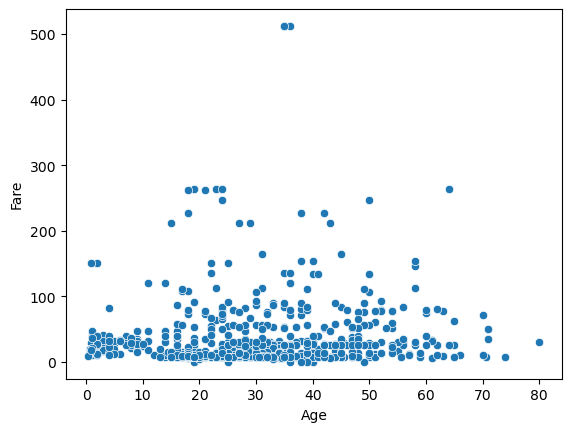

In [60]:
sns.scatterplot(x=df1['Age'],y=df1['Fare'])
plt.show()

Numerical Vs Categorical

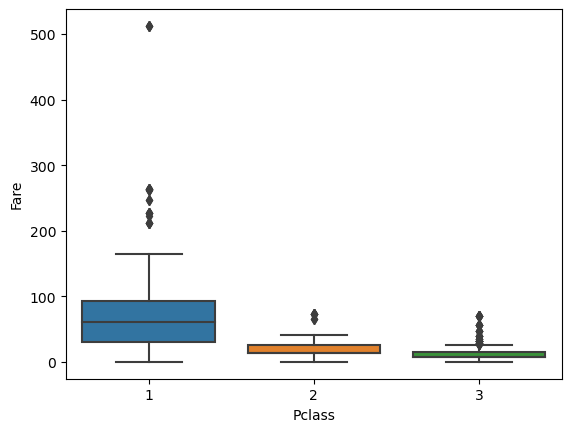

In [61]:
sns.boxplot(x=df1['Pclass'],y=df1['Fare'])
plt.show()

#X-axis -> Category Column
#Y-axis -> Numeric Column


-----------Survived vs Age-----------


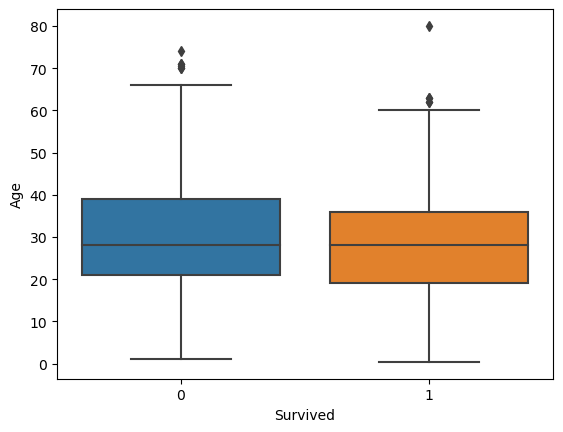

-----------Survived vs Fare-----------


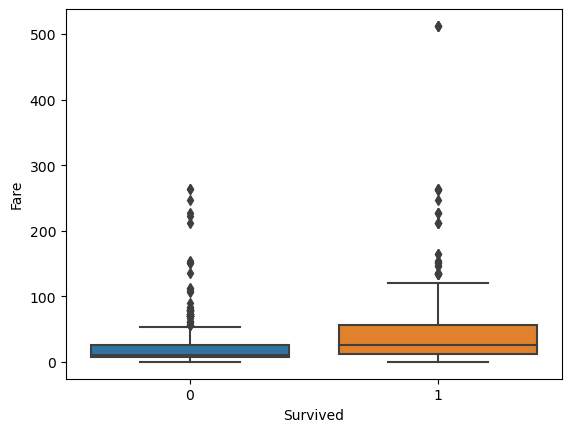

-----------Pclass vs Age-----------


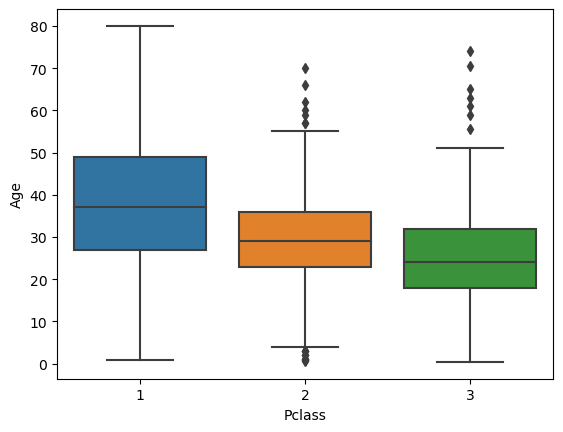

-----------Pclass vs Fare-----------


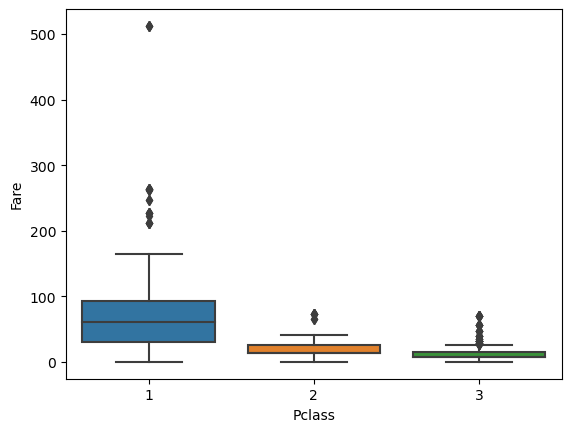

-----------Sex vs Age-----------


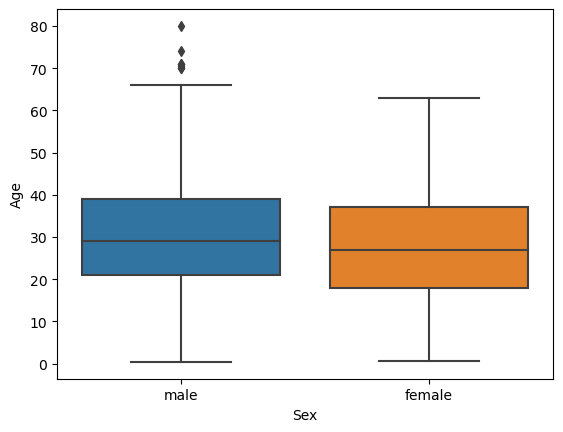

-----------Sex vs Fare-----------


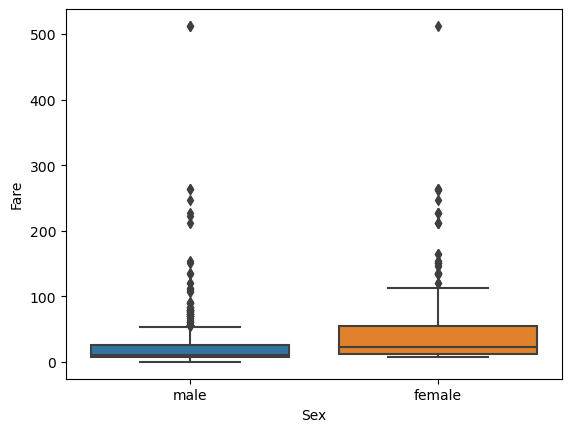

-----------SibSp vs Age-----------


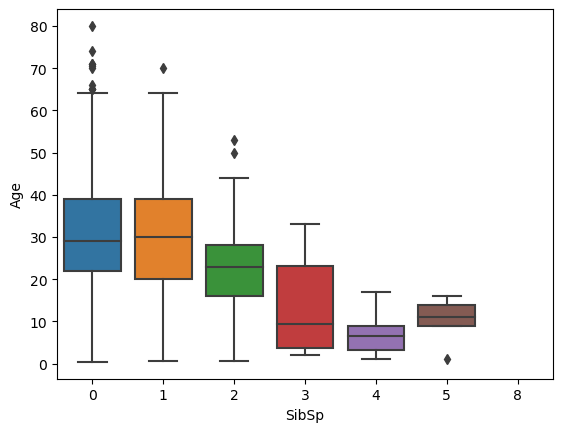

-----------SibSp vs Fare-----------


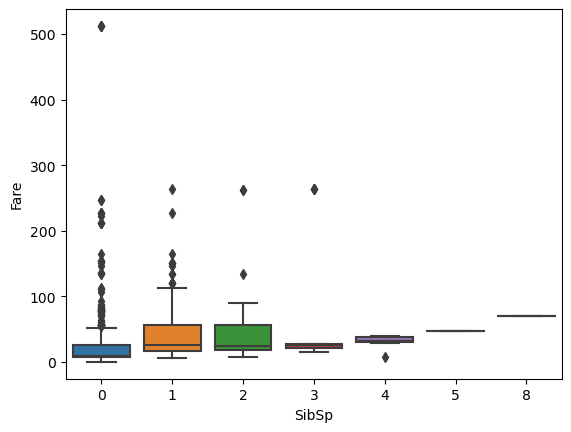

-----------Parch vs Age-----------


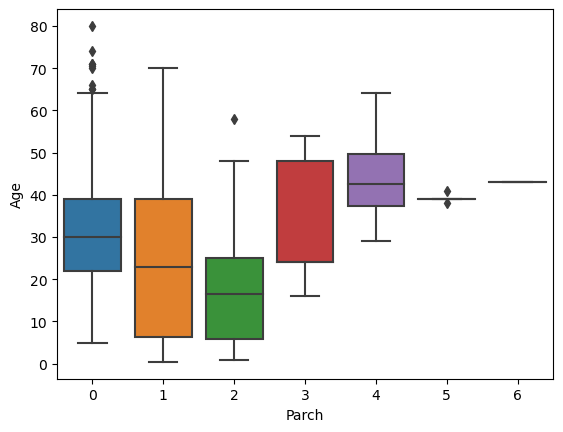

-----------Parch vs Fare-----------


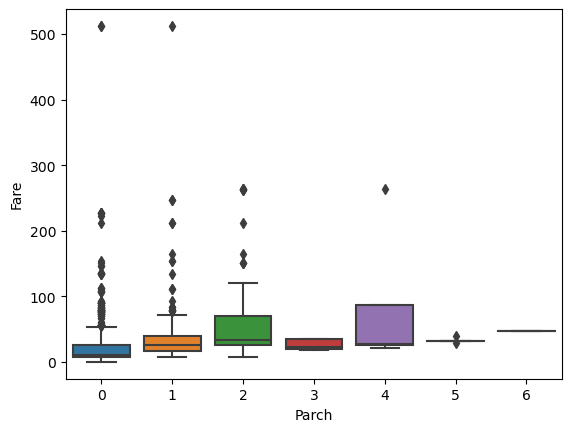

-----------Embarked vs Age-----------


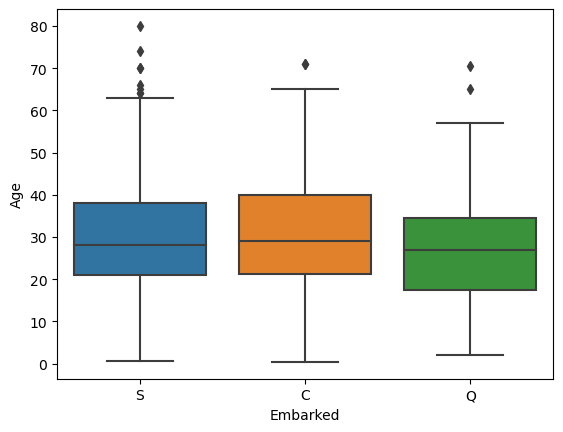

-----------Embarked vs Fare-----------


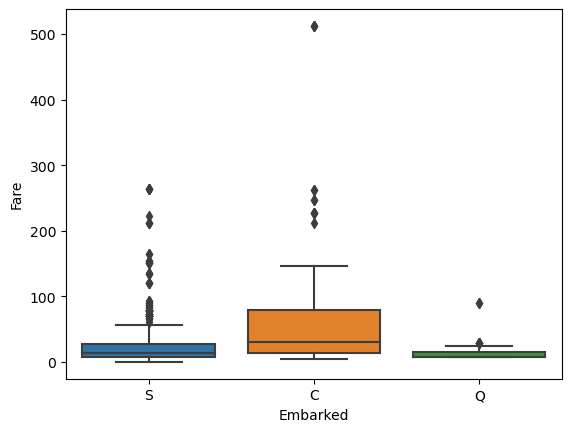

In [63]:
for i in cat_cols:
    for j in num_cols:
        print("-----------" + i + " vs " + j + "-----------")
        sns.boxplot(x=df1[i],y=df1[j])
        plt.show()


#brings 3 insights from Bivariate result of Numerical Vs Categorical Column

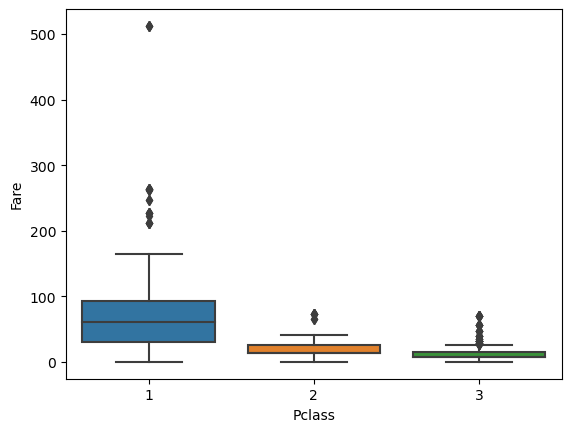

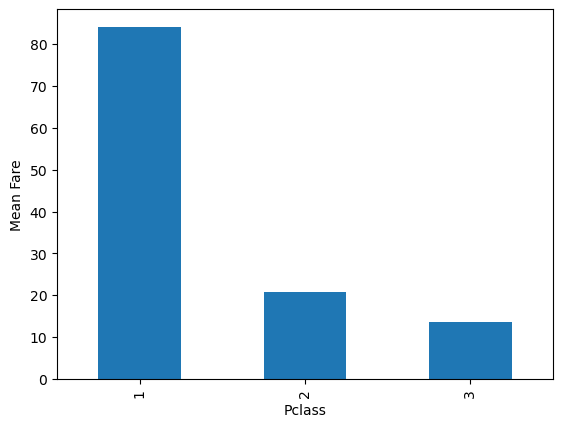

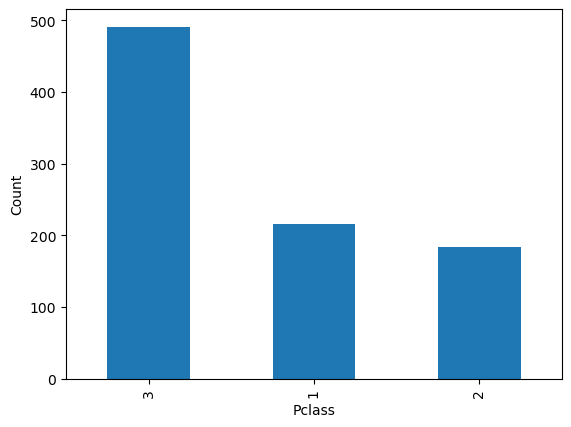

In [70]:


# Insight 1: the distribution of the numerical column per category
sns.boxplot(x='Pclass', y='Fare', data=df1)
plt.show()

# Insight 2:  the mean of the numerical column per category
df1.groupby('Pclass')['Fare'].mean().plot(kind='bar')
plt.ylabel('Mean Fare')
plt.show()

# Insight 3: the count of each category
df1['Pclass'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()




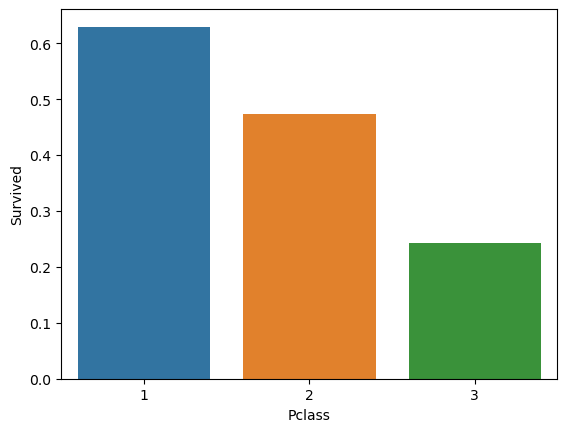

In [76]:
sns.barplot(x=df1['Pclass'], y=df1['Survived'], ci=None)
plt.show()  

Mulivariate Anlysis

# Correlation represents strength of relationship between variables

# Correlation ties in the range of -1 to 1

# Negative correlation (0 to —1) shows inverse relationship

# Positive correlation (0 to 1) shows direct relationship

# correlation represents no relationship.

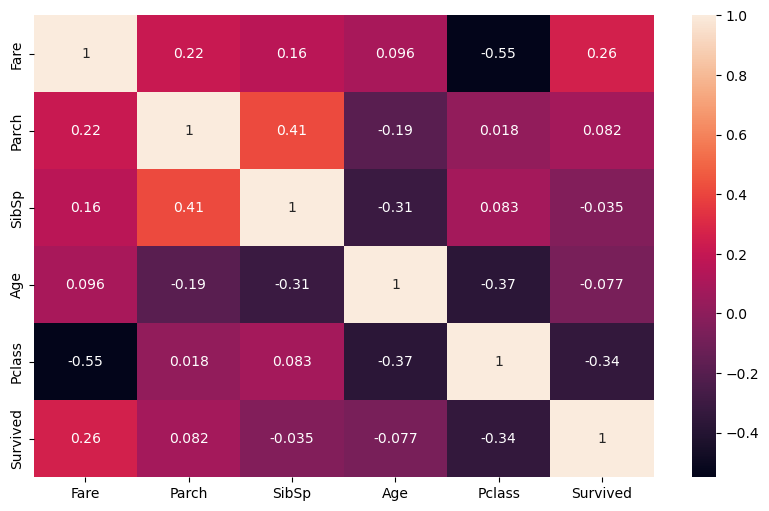

In [84]:
#multi-variate analysis
plt.figure(figsize=(10,6))
sns.heatmap(df1[['Fare','Parch', 'SibSp', 'Age', 'Pclass','Survived']].corr(),annot=True)
plt.show()
